In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
ht = pd.read_csv('hotel_bookings.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
ht.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [6]:
ht.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

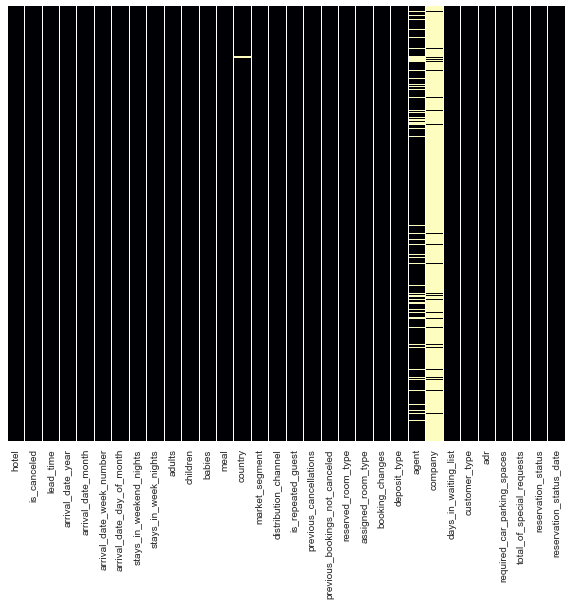

In [7]:
#graphing NA values in each categories.
plt.figure(figsize=(10,8))
sns.heatmap(ht.isna(),yticklabels=False,cbar=False,cmap='magma')

In [8]:
#firstly we are going to separate customers into two groups whether they are coming with their child or not.
def f(x):
    if x['children'] > 0:
        return 1
    elif x['babies'] > 0:
        return 1
    else:
        return 0
ht['fam']=ht.apply(f,axis=1)

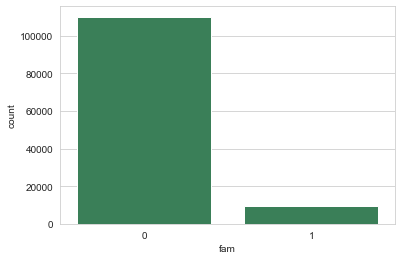

In [9]:
sns.countplot(x='fam',data=ht,color='seagreen')

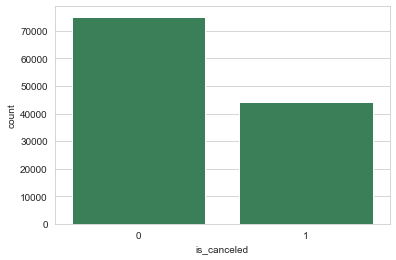

In [10]:
#how many canceled reservation
sns.countplot(x='is_canceled',data=ht,color='seagreen')

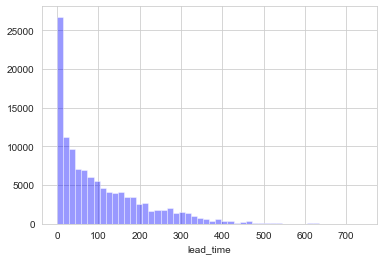

In [11]:
#count lead_time which is days a customer's arrival date from the booking date.
sns.distplot(ht['lead_time'],bins=50,kde=False,color='Blue')

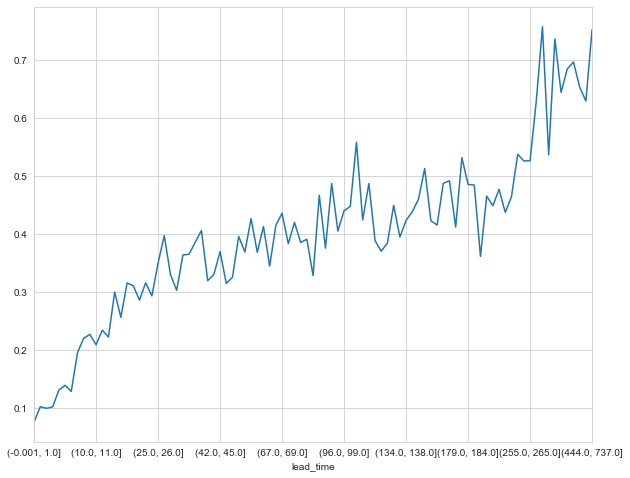

In [12]:
#graphing average cancelation depends on lead_time
plt.figure(figsize=(10,8))
ltcdmean=ht.groupby(pd.qcut(ht['lead_time'],q=100,duplicates='drop'))['is_canceled'].mean()
ltcdmean.plot()

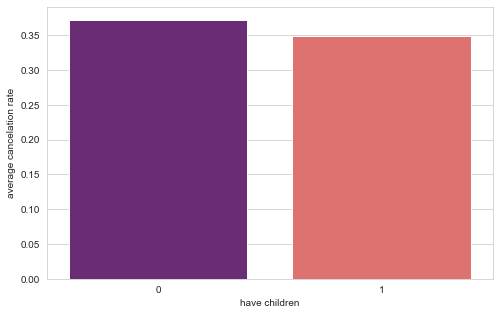

In [13]:
#average cancelation rate between customers coming with children and customers without 
famcdmean = ht.groupby(ht['fam'])['is_canceled'].mean()
famcdmean
plt.figure(figsize=(8,5))
sns.barplot(famcdmean.index,famcdmean.values,palette='magma')
plt.xlabel('have children')
plt.ylabel('average cancelation rate')
plt.show()

(44224, 5942)

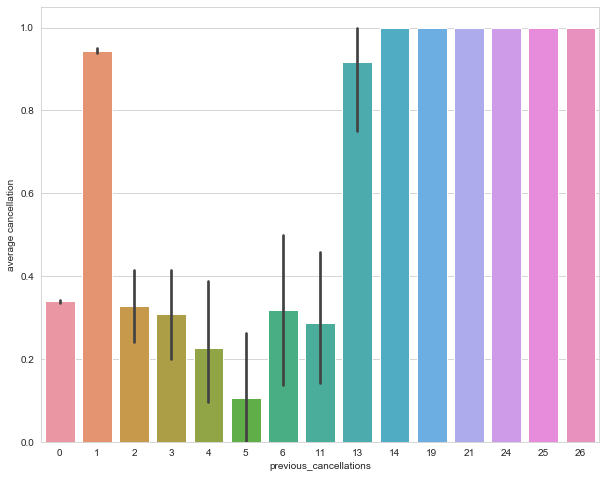

In [46]:
#number of cancellation from who have previous cancellations histoy 
#graph of average cancellation rate based on previous cancellations history.
plt.figure(figsize=(10,8))
htcd=ht[ht['is_canceled'] > 0]
htcdprc=htcd[htcd['previous_cancellations'] > 0]
sns.barplot(x='previous_cancellations',y='is_canceled',data=ht)
plt.ylabel ('average cancellation')
htcd['is_canceled'].count(),htcdprc['is_canceled'].count()

Text(0, 0.5, 'count')

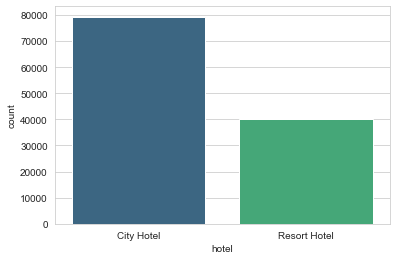

In [15]:
#count how many cancellations by hotel type.
sns.barplot(x="hotel", y="is_canceled", data=ht.groupby("hotel").is_canceled.count().reset_index(),palette='viridis')
plt.ylabel ('count')

Text(0, 0.5, 'count')

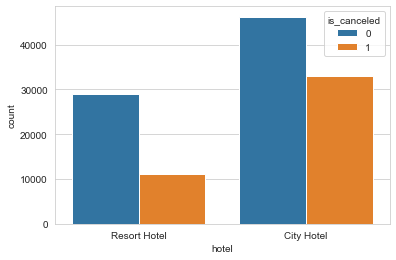

In [16]:
#count cancellations and bookings by hotel type
sns.countplot("hotel", hue="is_canceled", data=ht)
plt.ylabel('count')

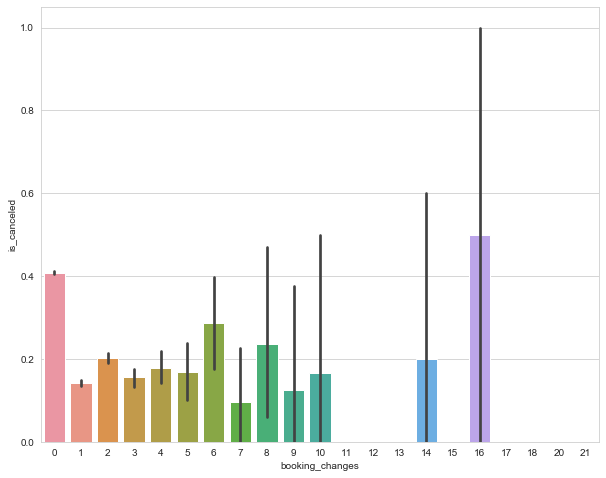

In [50]:
#graph to figure if there are correlations between booking changes and cancellation rates.
plt.figure(figsize=(10,8))
htbc=ht[ht['booking_changes'] > 0]
sns.barplot(x='booking_changes',y='is_canceled',data=ht)

Text(0, 0.5, 'average cancellation rate')

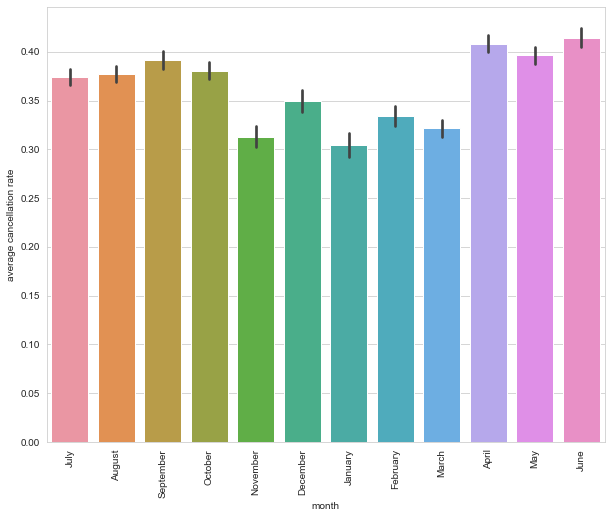

In [40]:
#cancellation rate status by Month.
plt.figure(figsize=(10,8))
sns.barplot(x='arrival_date_month',y='is_canceled',data=ht)
plt.xticks(rotation = 90)
plt.xlabel('month')
plt.ylabel('average cancellation rate')

Text(0, 0.5, 'average cancellation rate')

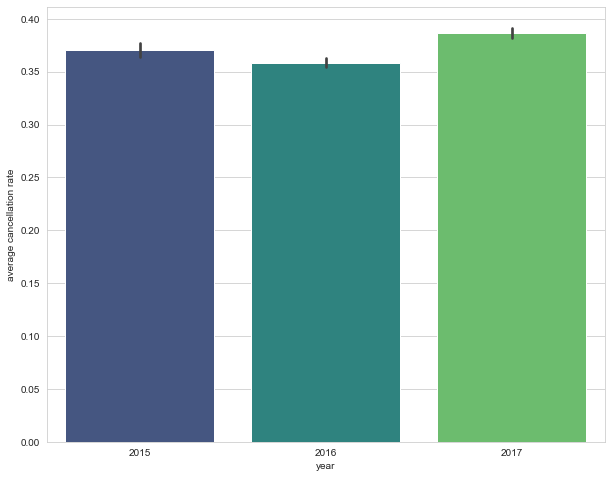

In [45]:
#cancellation rate status by Year.
plt.figure(figsize=(10,8))
sns.barplot(x='arrival_date_year',y='is_canceled',data=ht,palette='viridis')
plt.xlabel('year')
plt.ylabel('average cancellation rate')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

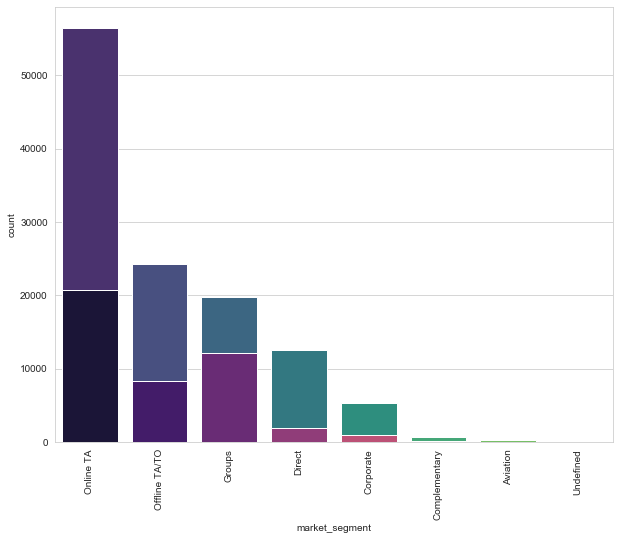

In [20]:
#graphing total count and cancellations count by type of market segments
plt.figure(figsize=(10,8))
sns.countplot(x="market_segment", data = ht,palette = 'viridis',order = ht['market_segment'].value_counts().index)
plt.xticks(rotation = 90),
mkct=ht[ht['is_canceled'] > 0]
sns.countplot(x="market_segment", data = mkct,palette = 'magma',order = ht['market_segment'].value_counts().index)
plt.xticks(rotation = 90)

Text(0, 0.5, 'average cancellation rate')

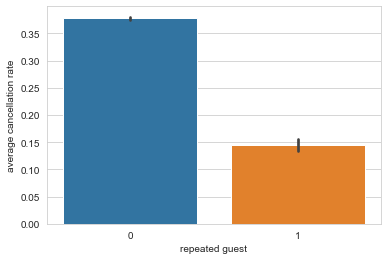

In [27]:
#cancellation rate difference between repeated guests and non repeated guests
sns.barplot(x='is_repeated_guest',y='is_canceled',data=ht)
plt.xlabel('repeated guest')
plt.ylabel('average cancellation rate')

Text(0, 0.5, 'count')

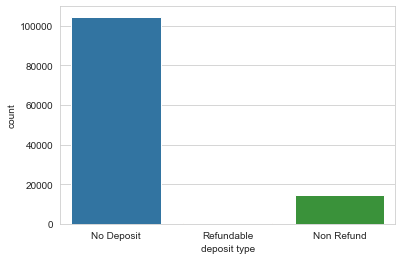

In [37]:
#counts by type of deposit
sns.countplot(x='deposit_type',data=ht)
plt.xlabel('deposit type')
plt.ylabel('count')

Text(0.5, 0, 'canceled with non refund deposit')

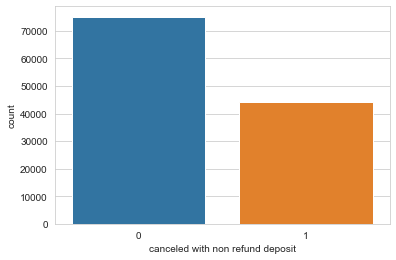

In [39]:
#cancellation counts with non refund deposit
htnr=ht[ht['deposit_type'] == 'Non Refund']
sns.countplot('is_canceled',data=ht)
plt.xlabel('canceled with non refund deposit')